## Implementing a ChatGPT App with LangChain from Scratch

This is part of my **"Learn LangChain, Pinecone & OpenAI: Build Next-Gen LLM Apps"** course.

前面章節都是單輪對話，本章會傳授如何做一個聊天機器人


In [4]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=True) 

from langchain_openai import ChatOpenAI
from langchain.schema import SystemMessage
from langchain.chains import LLMChain
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate

llm = ChatOpenAI(model_name='gpt-4-turbo-preview', temperature=1)

prompt = ChatPromptTemplate(
    input_variables=["content"],
    messages=[
#         SystemMessage(content="You are a chatbot having a conversation with a human."),
        SystemMessage(content='You are a physicist and you are having a conversation with a human who speaks in English or Chinese.'),  
        HumanMessagePromptTemplate.from_template("Explain {content} in one sentence.")
    ]
)

chain = LLMChain(
    llm=llm,
    prompt=prompt,
    verbose=True # debug 訊息，顯示 prompt 和 response
)

while True:
    content = input('Your prompt: ')
    if content.lower() in ['quit', 'exit', 'bye']:
        print('Goodbye!')
        break
    
    response = chain.invoke({'content': content})
    print(response)
    print('-' * 50)





> Entering new LLMChain chain...
Prompt after formatting:
System: You are a physicist and you are having a conversation with a human who speaks in English or Chinese.
Human: Explain 靜電感應 in one sentence.

> Finished chain.
{'content': '靜電感應', 'text': '靜電感應是指當一個帶電體接近另一個中性體時，在中性體內部的正負電荷重新分布，形成了局部的正負電荷區域，但中性體本身總電荷保持不變的現象。'}
--------------------------------------------------
Goodbye!


## Adding Chat Memory Using ConversationBufferMemory

In [41]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=False) 

from langchain_openai import ChatOpenAI
from langchain.schema import SystemMessage
from langchain.chains import LLMChain


# 1. Imports
from langchain.memory import ConversationBufferMemory
from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, MessagesPlaceholder
llm = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=1)

# 2. Create memory 
memory = ConversationBufferMemory(
    memory_key='chat_history',
    return_messages=True
)

# 3. add  MessagesPlaceholder(variable_name='messages') to the prompt
## MessagesPlaceholder 用來串接過去的對話記錄
prompt = ChatPromptTemplate(
    input_variables=["content", "chat_history"],
    messages=[
        SystemMessage(content="You are a chatbot having a conversation with a human."),
        MessagesPlaceholder(variable_name="chat_history"), # Where the memory will be stored.
        HumanMessagePromptTemplate.from_template("{content}")
    ]
)

# 4. Add the memory to the chain
chain = LLMChain(
    llm=llm,
    prompt=prompt,
    memory=memory,
    verbose=False
)

while True:
    content = input('Your prompt: ')
    if content.lower() in ['quit', 'exit', 'bye']:
        print('Goodbye!')
        break
    
    response = chain.invoke({'content': content})
    # print(response["content"][-2:][1].content)
    print(f'Human: {response["chat_history"][-2:][0].content}')
    print(f'AI: {response["chat_history"][-2:][1].content}')
    
    print('-' * 50)
    


Human: 加密貨幣是詐騙嗎
AI: 加密貨幣並不是一種詐騙。加密貨幣是一種基於區塊鏈技術的數位資產，例如比特幣和以太幣等。這些貨幣的價值是由供需市場決定的，並且它們的交易是透明和可追蹤的。

然而，正如任何其他投資或金融工具一樣，加密貨幣市場也存在風險。一些人可能會利用加密貨幣來進行詐騙活動，例如假冒的交易平台、詐騙众籌活動或操縱市場等手法。因此，選擇參與加密貨幣市場時，你需要保持警覺並確保你使用可靠和安全的平台進行交易。

重要的是要進行足夠的研究，了解所選擇的加密貨幣、市場動態和相關的風險。同時，請注意只投入你準備承擔風險的金額，並請考慮尋求專業意見，在做出任何投資決策之前，仔細考慮自己的個人情況和風險承受能力。
--------------------------------------------------
Human: 歷史上有那些著名的詐騙案件
AI: 歷史上有許多著名的詐騙案件，以下是其中一些例子：

1. 荷騰金融集團詐騙案：荷騰金融集團是一家以荷里活為基地的投資公司，於1920年代以高回報承諾吸引投資者。然而，這家公司實際上是一個庞謁騙局，它的經營模式是將新投資者的錢用於支付之前投資者的利息。最終，這個詐騙被揭穿，荷騰金融集團破產。

2. 馬杜夫船公司詐騙案：在20世紀50年代，紐約的馬杜夫船公司聲稱擁有一些賺錢的船隻，並向投資者銷售這些船隻的股份。然而，該公司並沒有真實存在的船隻，而是以詐騙方式獲取投資者的資金。這個詐騙被稱為歷史上最大的股市詐騙之一。

3. 安然公司詐騙案：安然公司是一家在20世紀90年代和2000年代初期運營的能源公司。該公司因其假帳目、會計不正確和隱瞞巨額債務而聞名，最終於2001年破產。這個詐騙案震驚了金融界，引發了一系列的調查和訴訟。

這只是一些著名的詐騙案件的例子，歷史上還有許多其他類型的詐騙案例，例如庞謁騙局、證券詐騙、騙婚詐騙等等。這些案件提醒我們保持警覺和足夠的謹慎，特別是在投資和金融領域。
--------------------------------------------------
Human: 給我和加密貨幣相關的案件
AI: 以下是一些與加密貨幣相關的案件：

1. 馬克·卡爾佩萊斯的比特幣詐騙案：馬克·卡爾佩萊斯是比特幣初創公司 Mt. Gox 的創始人之一。該公司在2014年破產，聲

## Saving Chat Sessions
將歷史紀錄儲存下來，本篇將示範如何存成json，若要塞進SQL，可以參考這裡 [Link](https://python.langchain.com/docs/integrations/memory/sql_chat_message_history)

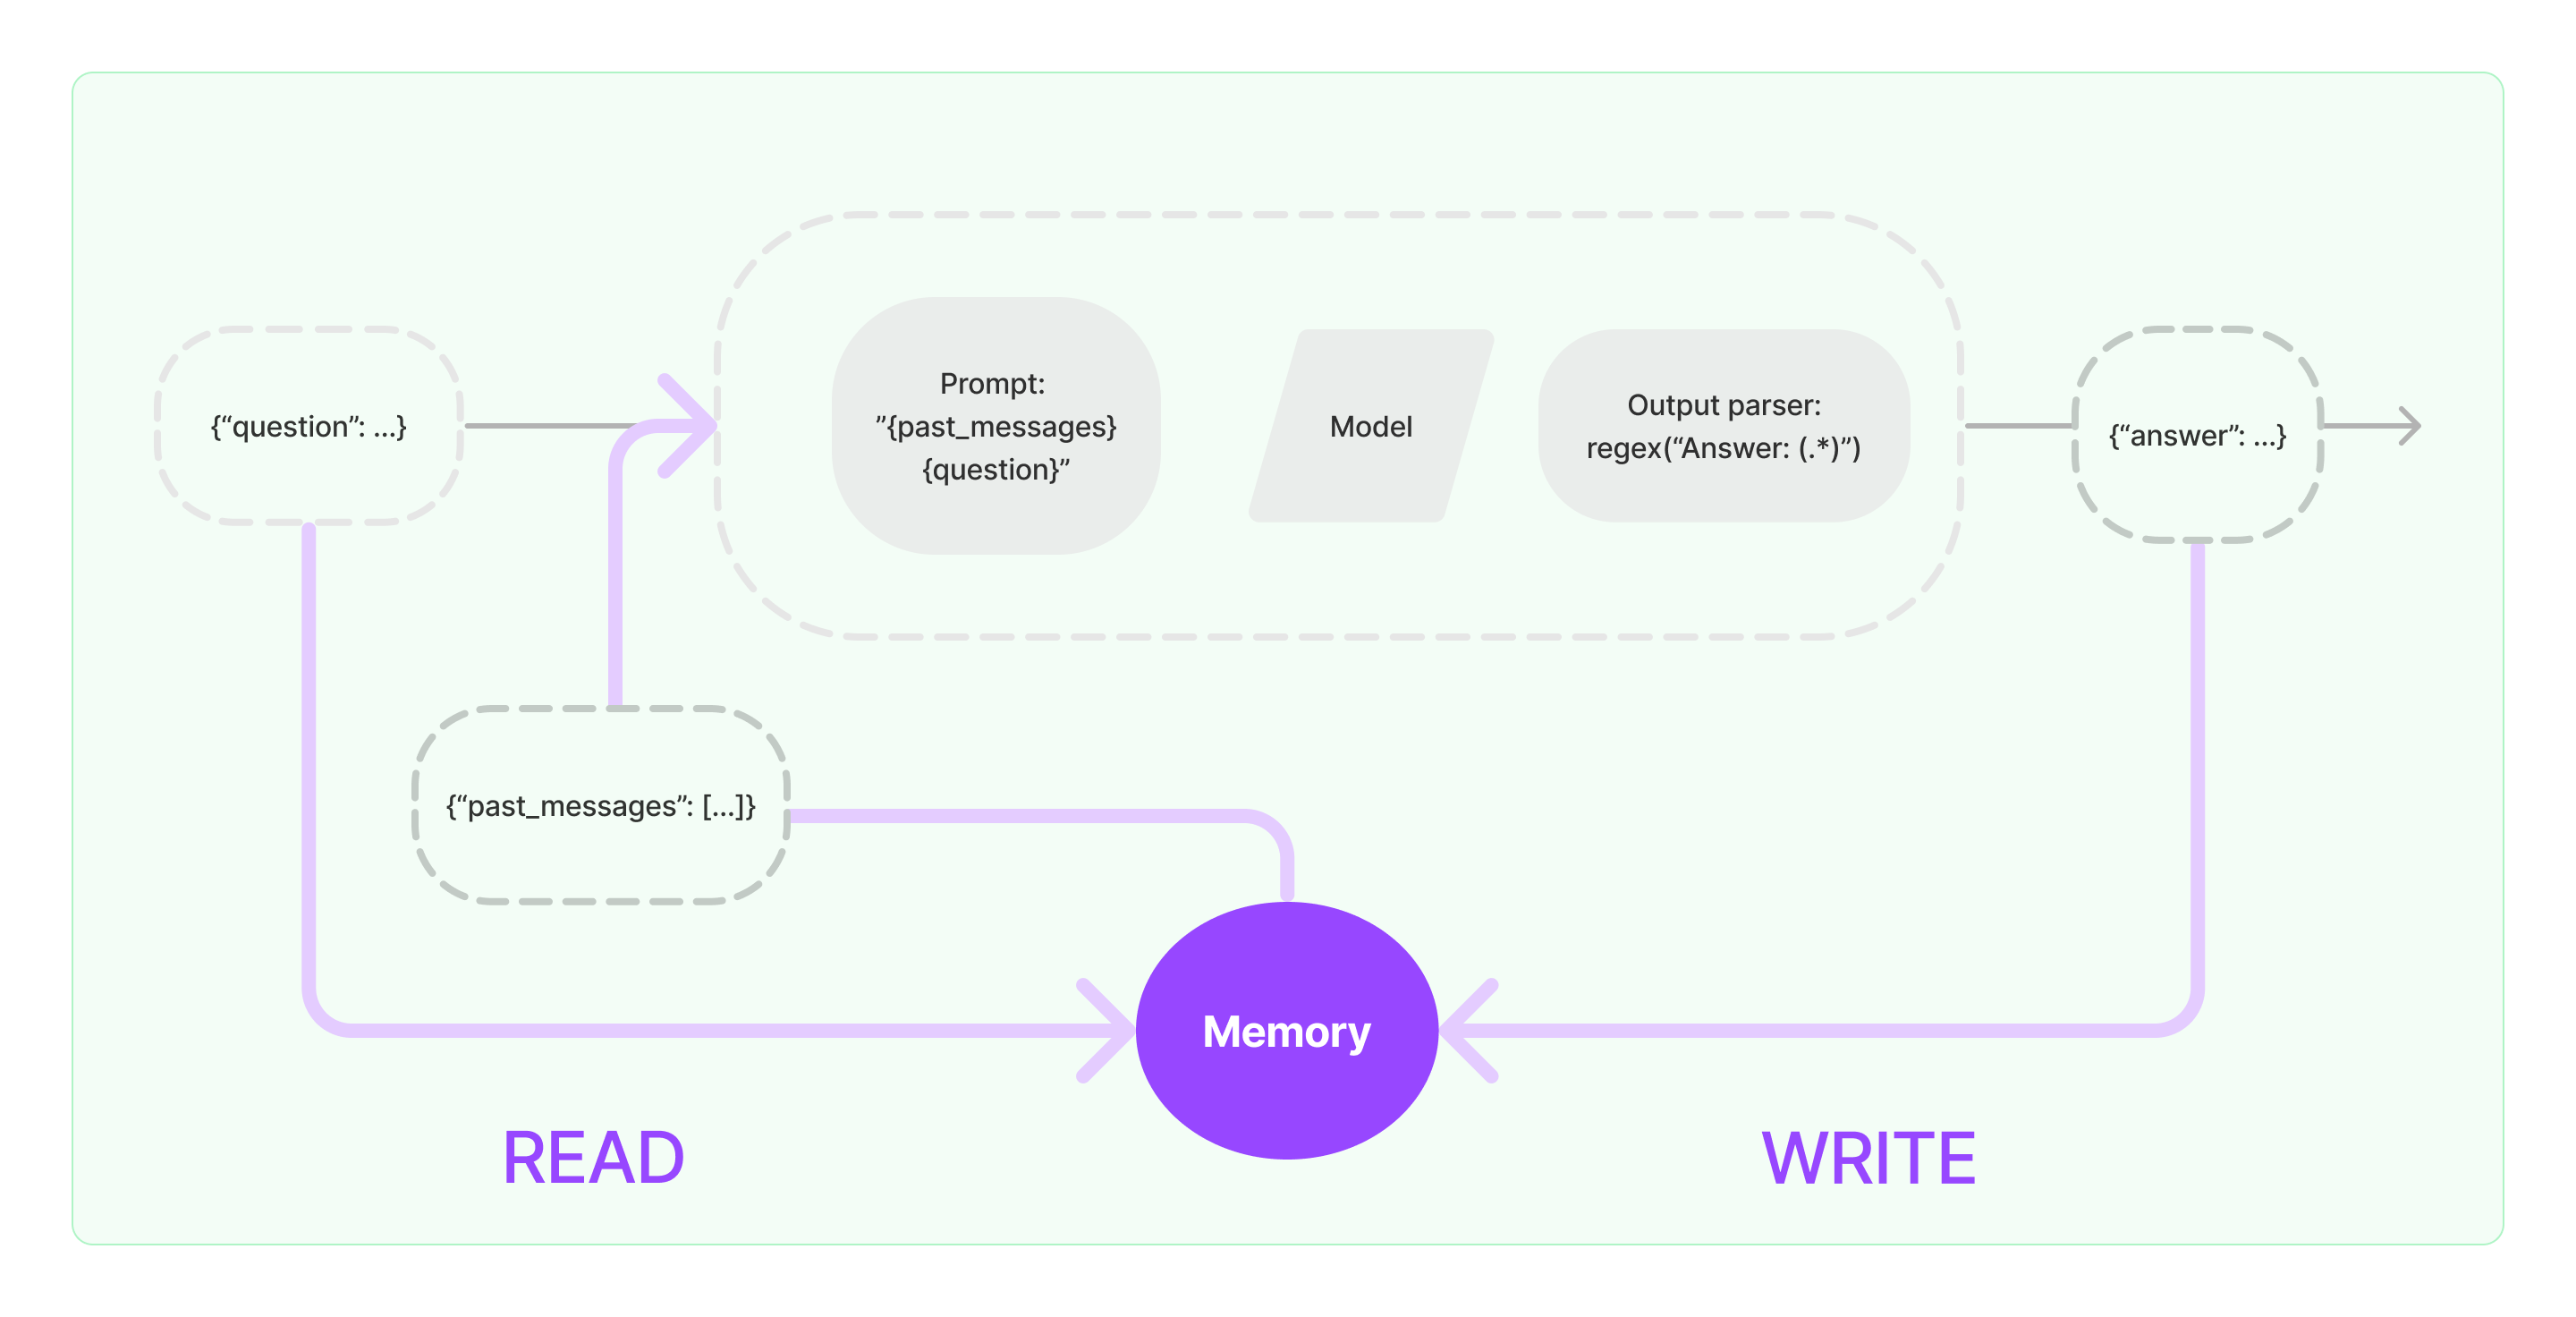

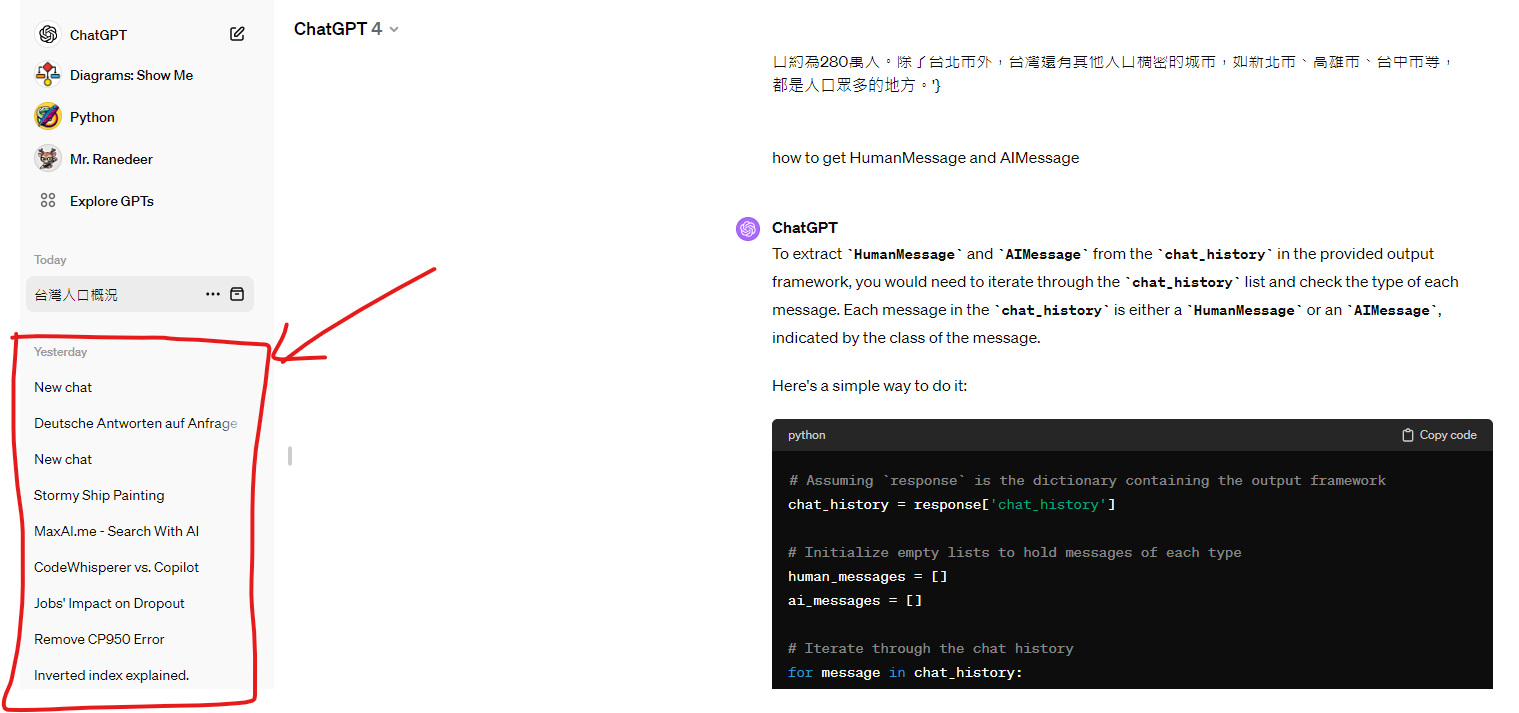

In [43]:
from dotenv import load_dotenv, find_dotenv
load_dotenv(find_dotenv(), override=False) 

from langchain_openai import ChatOpenAI
from langchain.schema import SystemMessage
from langchain.chains import LLMChain

# 1. Import FileChatMessageHistory
from langchain.memory import ConversationBufferMemory, FileChatMessageHistory

from langchain.prompts import ChatPromptTemplate, HumanMessagePromptTemplate, MessagesPlaceholder

llm = ChatOpenAI(model_name='gpt-3.5-turbo', temperature=1)

# 2. Add an additional keyword argument to the ConversationBufferMemory() constructor
# FileChatMessageHistory 用來儲存對話記錄
history = FileChatMessageHistory('chat_history.json')
memory = ConversationBufferMemory(
    memory_key='chat_history',
    chat_memory=history,
    return_messages=True
)

prompt = ChatPromptTemplate(
    input_variables=["content", "chat_history"],
    messages=[
        SystemMessage(content="You are a chatbot having a conversation with a human."),
        MessagesPlaceholder(variable_name="chat_history"), 
        HumanMessagePromptTemplate.from_template("{content}")
    ]
)

chain = LLMChain(
    llm=llm,
    prompt=prompt,
    memory=memory,
    verbose=False
)

while True:
    content = input('Your prompt: ')
    if content.lower() in ['quit', 'exit', 'bye']:
        print('Goodbye!')
        break
    
    response = chain.invoke({'content': content})
    print(f'Human: {response["chat_history"][-2:][0].content}')
    print(f'AI: {response["chat_history"][-2:][1].content}')
    print('-' * 50)
    

Human: 地球重量如何測量?
AI: 地球的重量是通過測量其質量來確定的。質量是物體所含物質的量，而重量則是物體所受地球引力的力道。在科學上，我們使用稱為重力的力量來測量地球的重量。

有幾種方法可以測量地球的質量和重量。其中一種方法是使用地球的引力來測量物體的重量。這可以通過將一個已知質量的物體（如標準千克）放在地球上，然後使用稱為負載級的儀器來測量其重量。通過這種方式，我們可以根據地球的引力將其重量轉化為質量。

另一種常見的方法是使用地球的重力場強度（也稱為地球的重力加速度）來測量物體的重量。這可以通過使用稱為測重計的儀器來進行。測重計會測量物體所受到的地球引力，從而推斷出物體的重量。

總之，地球的重量是通過測量其質量並利用地球的引力或重力場強度來確定的。
--------------------------------------------------
Human: 地球重量如何測量
AI: 地球的重量無法單獨測量，因為重量是指物體受到地球引力的力道，地球本身並沒有重量。

但是，我們可以通過測量物體在地球上的質量來推斷地球的質量。地球的質量被稱為地球的重量，是一個固定的數值。科學家使用各種方法和技術來測量地球的質量，並持續進行精確的測量和研究。

最常用的方法之一是利用地球引力的測量。科學家使用天體運動的觀測數據，如地球和月球的運動軌道，以及其他天體之間的引力相互作用，來計算地球的質量。這需要複雜的數學模型和精密的觀測儀器。

另一種方法是使用地球的重力場測量。這可以通過建立重力測量網絡，使用重力計測量不同地區的重力值來進行。重力測量網絡可以提供關於地球內部結構以及地球質量分佈的重要信息。

總而言之，地球的重量無法單獨測量，但可以通過觀測和測量其他物體在地球上的質量來推斷地球的質量。這需要使用科學方法和技術來進行精確的測量和分析。
--------------------------------------------------
Human: 有相關公式的計算過程嗎
AI: 是的，測量地球質量的常用公式是牛頓萬有引力定律。根據牛頓萬有引力定律，兩個物體之間的引力可以通過以下公式計算：

F = G * (m1 * m2) / r^2

其中，
F代表兩個物體之間的引力；
G為重力常數，其值為6.67430 × 10^-11 N m^2 / kg

In [45]:
# The messages property contains the list of messages in order.
for i in history.messages:
    print(i.content)

地球重量如何測量?
地球的重量是通過測量其質量來確定的。質量是物體所含物質的量，而重量則是物體所受地球引力的力道。在科學上，我們使用稱為重力的力量來測量地球的重量。

有幾種方法可以測量地球的質量和重量。其中一種方法是使用地球的引力來測量物體的重量。這可以通過將一個已知質量的物體（如標準千克）放在地球上，然後使用稱為負載級的儀器來測量其重量。通過這種方式，我們可以根據地球的引力將其重量轉化為質量。

另一種常見的方法是使用地球的重力場強度（也稱為地球的重力加速度）來測量物體的重量。這可以通過使用稱為測重計的儀器來進行。測重計會測量物體所受到的地球引力，從而推斷出物體的重量。

總之，地球的重量是通過測量其質量並利用地球的引力或重力場強度來確定的。
地球重量如何測量
地球的重量無法單獨測量，因為重量是指物體受到地球引力的力道，地球本身並沒有重量。

但是，我們可以通過測量物體在地球上的質量來推斷地球的質量。地球的質量被稱為地球的重量，是一個固定的數值。科學家使用各種方法和技術來測量地球的質量，並持續進行精確的測量和研究。

最常用的方法之一是利用地球引力的測量。科學家使用天體運動的觀測數據，如地球和月球的運動軌道，以及其他天體之間的引力相互作用，來計算地球的質量。這需要複雜的數學模型和精密的觀測儀器。

另一種方法是使用地球的重力場測量。這可以通過建立重力測量網絡，使用重力計測量不同地區的重力值來進行。重力測量網絡可以提供關於地球內部結構以及地球質量分佈的重要信息。

總而言之，地球的重量無法單獨測量，但可以通過觀測和測量其他物體在地球上的質量來推斷地球的質量。這需要使用科學方法和技術來進行精確的測量和分析。
有相關公式的計算過程嗎
是的，測量地球質量的常用公式是牛頓萬有引力定律。根據牛頓萬有引力定律，兩個物體之間的引力可以通過以下公式計算：

F = G * (m1 * m2) / r^2

其中，
F代表兩個物體之間的引力；
G為重力常數，其值為6.67430 × 10^-11 N m^2 / kg^2；
m1和m2分別代表兩個物體的質量；
r代表兩個物體之間的距離。

由於地球的質量（M）和半徑（R）是已知的，我們可以使用這個公式來計算地球的表面重力加速度（g）：

F = M * g

將這個等式與牛頓萬有引力定律結合，我們有：

M * g = G * (m

## 延伸思考: 單純串接 API 會導致回答不夠正確(幻覺)，如果希望結果的可信度變高，你會怎麼做呢?

Question-Answering Pipeline 拆解步驟:

1. Prepare the document (once per document)
* a) Load the data into LangChain Documents.
* b) Split the documents into chunks.
* c) Embed the chunks into numeric vectors.
* d) Save the chunks and the embeddings to a vector database.

1. Search (once per query)
* a) Embed the user's question.
* b) Using the question's embedding and the chunk
embeddings, rank the vectors by similarity to the question's
embedding. <br>The nearest vectors represent chunks similar to
the question

1. Ask (once per query)
* a) Insert the question and the most relevant chunks into a
message to a GPT model.
* b) Return GPT's answer
